# Pandas - Explode

## Python 2, Python 3 et encodage de caractères

En décembre 2008, lorsque Python 3 est sorti, certaines personnes n'étaient pas contentes. Les programmes Python 2 n'étaient pas compatibles avec Python 3 !

Cher Wilder, depuis le début, vous ne connaissez que Python 3. Et c'est bien ainsi, la syntaxe est plus simple et mieux harmonisée. Mais parfois, certains datasets ont été travaillés avec python 2, et il faut savoir les manipuler correctement.

En python 2, nous devions spécifier systématiquement l'encodage des caractères. C'est pourquoi vous avez parfois des caractères `u`, c'est-à-dire `unicode`. Afin de pouvoir les transformer, vous pouvez simplement exécuter la fonction standard `eval()`.

```
text_variable = "u'Hello'"
eval(text_variable)
>>> Hello
```

```
list_variable = "[u'Hello', u'Have a good day', u'Good morning']"
eval(list_variable)
>>> ['Hello', 'Have a good day', 'Good morning']
```

```
# What is the type of my initial variable ? A string.
type(list_variable)
>>> str
```

```
# What is the type of my variable after "eval()" function ? A list.
type(eval(list_variable))
>>> list
```

## Column exploding

Nous avons un DataFrame nommé *df*:

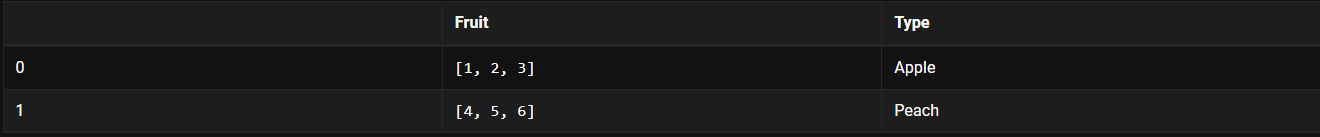

Nous pouvons utiliser la fonction `explode()` sur une Serie contenant des listes:

```
df['Fruit'].explode()
>>> 1
>>> 2
>>> 3
>>> 4
>>> 5
>>> 6
>>> Name: Fruit, dtype: object
```

Ou bien l'utiliser sur le DataFrame complet. Il faut alors préciser la colonne à exploser:
```
df.explode('Fruit')
```

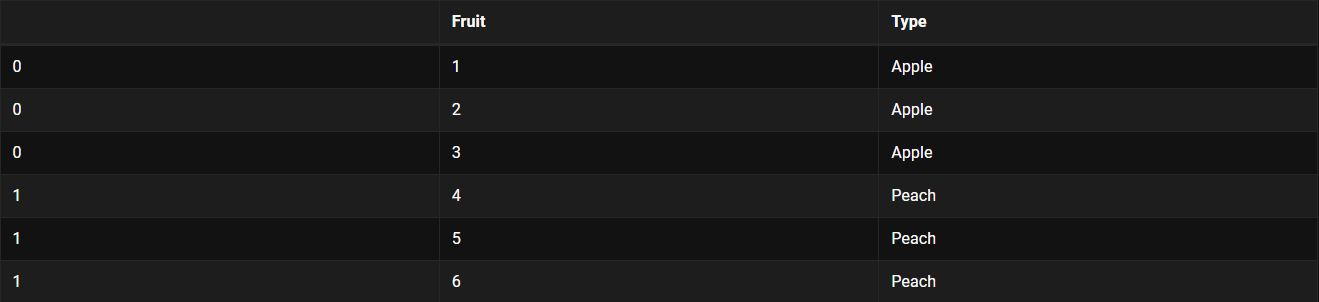

### Ressources : 

https://youtu.be/wn4haNNjisw

# Mission

Still using this dataset: http://bit.ly/imdbratings
- Which actor is mentioned the most often?


In [1]:
import pandas as pd

link = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv'
pd.read_csv(link)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [5]:
url = "http://bit.ly/imdbratings"
imdb_df = pd.read_csv(url)

imdb_df['actors_list'] = imdb_df['actors_list'].apply(eval)

exploded_actors = imdb_df['actors_list'].explode()

actor_counts = exploded_actors.value_counts()

most_mentioned_actor = actor_counts.idxmax()
print(f"The actor mentioned the most often is: {most_mentioned_actor}")

The actor mentioned the most often is: Robert De Niro
